In [172]:
!pip install scikit-learn==1.0
!pip install -U yellowbrick
#!pip install mlxtend

In [173]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.decomposition import PCA
#%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import sklearn

In [174]:

pokemon_train = pd.read_csv("/content/Pokemon_train.csv")
pokemon_test= pd.read_csv("/content/Pokemon_test.csv")
print(pokemon_train.head())
print('size of the data : ' ,pokemon_train.shape)

   against_bug  against_dark  against_dragon  ...  sp_defense      speed  type1
0     1.000000           1.0        1.000000  ...   50.000000  75.000000   rock
1     0.990403           1.0        0.990403  ...   81.343524  25.287898   rock
2     1.000000           1.0        1.000000  ...   50.000000  40.000000  water
3     0.500000           1.0        1.000000  ...  107.252130  68.297445   fire
4     0.334368           0.5        0.000000  ...  106.563172  73.250537  fairy

[5 rows x 33 columns]
size of the data :  (1251, 33)


In [175]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
pokemon_train["class"]=LabelEncoder.fit_transform(pokemon_train[["type1"]])

x_train = np.array(pokemon_train.iloc[:,0:31])
y_train = np.array(pokemon_train.iloc[:,32])
x_test = np.array(pokemon_test.iloc[:,0:31])
y_test = np.array(pokemon_test.iloc[:,32])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [176]:
cDict = {'bug':0, 'dark':1, 'dragon':2, 'electric':3, 'fairy':4, 'fighting':5, 'fire':6, 'ghost':7,
 'grass':8, 'ground':9, 'ice':10, 'normal':11, 'poison':12, 'psychic':13, 'rock':14, 'steel':15, 'water':16}

In [177]:
train = np.array([ cDict[lab] for lab in y_train])
test= np.array([ cDict[lab] for lab in y_test])

GNB & SVM

In [178]:
pokemon_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,class
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,2.000000,2.000000,2.000000,95.000000,7680.000000,70.000000,355.000000,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock,14
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,2.038386,0.990403,0.495202,0.490403,0.990403,0.990403,1.980807,2.000000,133.464544,3864.567294,70.000000,515.191932,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock,14
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,70.000000,5120.000000,70.000000,310.000000,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water,16
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,2.000000,123.588302,8491.030113,70.000000,527.747870,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire,6
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,0.337473,1.662527,1.000000,2.000000,1.000000,1.662527,2.000000,1.000000,56.749463,2560.000000,93.623119,524.076666,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.000000,1.0,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,59.114137,5120.000000,70.000000,434.308344,160.178881,54.141396,1.000000e+06,0.782283,64.778534,50.000000,379.218049,76.592845,77.991483,101.689948,electric,3
1247,0.250000,0.5,0.000000,2.000000,1.000000,0.250000,1.000000,1.000000,1.0,0.500000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,46.039017,2560.000000,70.000000,489.546241,47.824422,91.039017,8.000000e+05,1.143512,73.117052,88.100000,352.339304,104.156069,111.039017,64.156069,fairy,4
1248,1.000000,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,56.924721,7779.092938,45.763476,455.806227,89.591543,91.548327,1.000000e+06,0.769247,60.387082,76.383188,437.171933,105.397770,81.161245,60.387082,ice,10
1249,0.918972,1.0,1.000000,0.324110,1.000000,0.459486,2.000000,2.000000,1.0,0.878459,0.418972,2.000000,1.000000,0.581028,1.000000,1.486165,1.000000,1.837945,52.292479,3840.000000,70.000000,296.790468,233.122563,82.707521,6.000000e+05,0.548617,35.861653,50.000000,290.162055,33.241102,33.241102,59.446611,bug,0


In [179]:
GNB = GaussianNB()
GNB.fit(x_train ,y_train)
SV = svm.SVC()
SV.fit(x_train,y_train)

SVC()

accuracy for GNB :  52.715654952076676
accuracy for SVM :  12.140575079872203


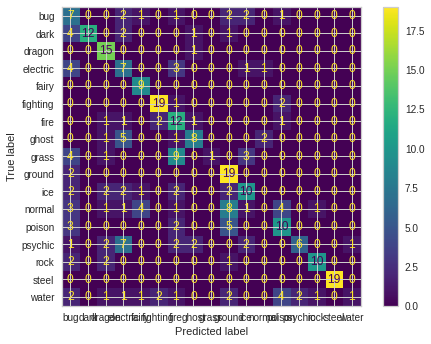

In [190]:
GNB = GaussianNB()
GNB.fit(x_train ,y_train)
SV = svm.SVC()
SV.fit(x_train,y_train)
ypred_GNB = GNB.predict(x_test)
ypred_SV = SV.predict(x_test)
GNB_acc = metrics.accuracy_score(y_test ,ypred_GNB)
print ("accuracy for GNB : " , GNB_acc*100)
SV_acc = metrics.accuracy_score(y_test , ypred_SV)
print ("accuracy for SVM : " , SV_acc*100)

disp = ConfusionMatrixDisplay.from_predictions(y_test, ypred_GNB)
# fig, ax = plt.subplots()
# disp = disp.plot(cmap=plt.cm.Blues)
plt.show()
# .plot(ax=ax)


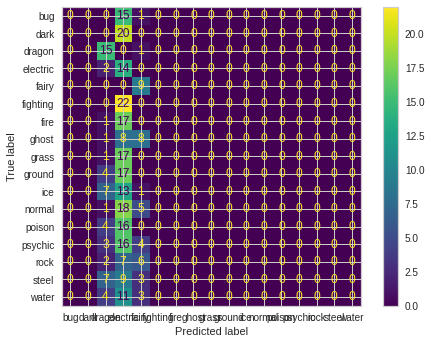

In [185]:

ConfusionMatrixDisplay.from_predictions(y_test, ypred_SV).plot(ax=ax)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
Xtrain_tsne = tsne.fit_transform(x_train)
Xtest_tsne = tsne.fit_transform(x_test)


In [ ]:
tsne = TSNE(n_components=2, random_state=0)
com_tsne = tsne.fit_transform(x_train)
com_tsne_nw = pd.DataFrame(com_tsne)
com_tsne_nw["class"] = pokemon_train["class"]
#com_tsne_nw
fig = px.scatter(
    com_tsne_nw, x=0, y=1 ,color="class" ,title='data after applying tsna'
)
#fig.title('data after applying tsna')
fig.show()

In [ ]:
GNB.fit(Xtrain_tsne, y_train)
yPred_tsne = GNB.predict(Xtest_tsne)
acc_tsne = metrics.accuracy_score(y_test, yPred_tsne) * 100

In [ ]:
acc_tsne

In [ ]:
cls_new = []
clas = list(set(y_train))
for i in range(len(clas)):
  cls_new.append(i)

In [ ]:
plt.scatter(Xtrain_tsne[:,0],Xtrain_tsne[:,1] ,label=y_train , marker='o')

3 (kmeans) , visyalize the data with tsna

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15) ,title='The Elbow Method showing the optimal k' ,fontsize='16')

visualizer.fit(x_train)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
#from the figure we can see that the best number of cluster starts from 4
new_model = KMeans(n_clusters=4,random_state=0)
km_labels =new_model.fit_predict(x_train)
#ypred = new_model.predict(y_test)

In [ ]:
#set(km_labels)
clusters = []
markers = ['o','x','*','+','^']
col=['r','g','b','y','black']
for i in range(len(km_labels)):
   if km_labels[i] == 0:
    c1 = plt.scatter(Xtrain_tsne[i,0],Xtrain_tsne[i,1],c='r', marker='o')
   elif km_labels[i] == 1:
    c2 = plt.scatter(Xtrain_tsne[i,0],Xtrain_tsne[i,1],c='g', marker='+')
   elif km_labels[i] == 2:
    c3 = plt.scatter(Xtrain_tsne[i,0],Xtrain_tsne[i,1],c='b', marker='*')
   elif km_labels[i] == 3:
    c4 = plt.scatter(Xtrain_tsne[i,0],Xtrain_tsne[i,1],c='y', marker='x')
   elif km_labels[i] == 4:
    c5 = plt.scatter(Xtrain_tsne[i,0],Xtrain_tsne[i,1],c='black', marker='<')
plt.legend([c1, c2, c3 , c4 ],['Cluster 0', 'Cluster 1',
  'Cluster 2' , 'Cluster 3' ])
plt.title('K-means clusters into 4 clusters', fontsize='17')
plt.show()

# (4)Dimensionality Reduction (DR) methods (PCA)

In [ ]:
# (1) GNB classifiers test accuracies
acc_list =[]
n_components =[]
for n in range(1,32):
  pca =PCA(n_components=n, random_state=0)
  XTr_pca = pca.fit_transform(x_train)
  XTs_pca = pca.fit_transform(x_test)
  GNB.fit(XTr_pca,y_train)
  ypred_GNBDR=GNB.predict(XTs_pca)
  acc_n = metrics.accuracy_score(y_test ,ypred_GNBDR)*100
  acc_list.append(acc_n)
  n_components.append(n)

In [ ]:
plt.plot(n_components ,acc_list,'bx-')
plt.axhline(y=(GNB_acc*100), color='r', linestyle='-')
plt.xlabel('number of features',fontsize = 16)
plt.ylabel('Accuracy %',fontsize = 16)
plt.title('DR with PCA method for (GNB)' ,fontsize = 16)

plt.show

max_y = max(acc_list)  # Find the maximum accuracy value
max_x = n_components[acc_list.index(max_y)]  # Find the the number of component value corresponding to the maximum  accuracy
plt.axvline(x=max_x,color='black' , linestyle=':')
print ("max accuracy :" , max_y)
print ("corresponding max n_cmponents :" , max_x)

In [ ]:
#(2) SVM classifiers test accuracies
acc_list2 =[]
n_components2 =[]
for n in range(1,32):
  pca =PCA(n_components=n, random_state=54)
  XTr_pca1 = pca.fit_transform(x_train)
  XTs_pca1 = pca.fit_transform(x_test)
  SV.fit(XTr_pca1,y_train)
  ypred_SVDR=SV.predict(XTs_pca1)
  acc_n = metrics.accuracy_score(y_test ,ypred_SVDR)*100
  acc_list2.append(acc_n)
  n_components2.append(n)

In [ ]:
plt.plot(n_components2 ,acc_list2,'bx-')
plt.axhline(y=(SV_acc*100), color='r', linestyle='-')
plt.xlabel('number of features',fontsize = 16)
plt.ylabel('Accuracy %',fontsize = 16)
plt.title('DR with PCA method for (SVM)' ,fontsize = 16)
plt.show

max_y = max(acc_list2)  # Find the maximum accuracy value
max_x = n_components[acc_list2.index(max_y)]  # Find the the number of component value corresponding to the maximum  accuracy
plt.axvline(x=max_x,color='black' , linestyle=':')
print ("max accuracy :" , max_y)
print ("corresponding max n_cmponents :" , max_x)

(4)Dimensionality Reduction (DR) methods (LDA)

In [ ]:
# (1) GNB classifiers test accuracies
acc_list11 =[]
n_components11 =[]
for n in range(1,17):
  LDA = LinearDiscriminantAnalysis(n_components=n)
  XTr_lda =LDA.fit_transform(x_train,y_train)
  XTs_lda =LDA.transform(x_test) 
  GNB.fit(XTr_lda,y_train)
  ypred_GNBlda=GNB.predict(XTs_lda)
  if n ==10:
    xtr_max_lda =XTr_lda
    xts_max_lda = XTs_lda
    #ytr_max_lda =LDA.transform(y_train)
  acc_n = metrics.accuracy_score(y_test ,ypred_GNBlda)*100
  acc_list11.append(acc_n)
  n_components11.append(n)

In [ ]:
xtr_max_lda1=sklearn.preprocessing.MinMaxScaler().fit_transform(xtr_max_lda)
xts_max_lda1=sklearn.preprocessing.MinMaxScaler().fit_transform(xts_max_lda)


In [ ]:
plt.plot(n_components11 ,acc_list11,'bx-')
plt.axhline(y=(GNB_acc*100), color='r', linestyle='-')
plt.xlabel('number of features',fontsize = 16)
plt.ylabel('Accuracy %',fontsize = 16)
plt.title('DR with LDA method for (GNB)' ,fontsize = 16)
plt.show

max_y1= max(acc_list11)  # Find the maximum accuracy value
max_x1= n_components11[acc_list11.index(max_y1)]  # Find the the number of component value corresponding to the maximum  accuracy
plt.axvline(x=max_x1,color='black' , linestyle=':')  #pionting at the highest nymber of features 
print ("max accuracy :" , max_y1)
print ("corresponding max n_cmponents :" , max_x1)

In [ ]:
# (2) SVM classifiers test accuracies
acc_list22 =[]
n_components22 =[]
for n in range(1,16):
  LDA = LinearDiscriminantAnalysis(n_components=n)
  XTr_lda1 =LDA.fit_transform(x_train,y_train)
  XTs_lda1 =LDA.transform(x_test) 
  SV.fit(XTr_lda1,y_train)
  ypred_SVlda=SV.predict(XTs_lda1)
  if n ==10:
    xtr_max_lda_SV =XTr_lda
    xts_max_lda_SV = XTs_lda
  acc_n = metrics.accuracy_score(y_test ,ypred_SVlda)*100
  acc_list22.append(acc_n)
  n_components22.append(n)

In [ ]:
xtr_max_lda2=sklearn.preprocessing.MinMaxScaler().fit_transform(xtr_max_lda_SV)
xts_max_lda2=sklearn.preprocessing.MinMaxScaler().fit_transform(xts_max_lda_SV)


In [ ]:
plt.plot(n_components22 ,acc_list22,'bx-')
plt.axhline(y=(SV_acc*100), color='r', linestyle='-')
plt.xlabel('number of features',fontsize = 16)
plt.ylabel('Accuracy %',fontsize = 16)
plt.title('DR with LDA method for(SVM)' ,fontsize = 16)
plt.show

max_y2= max(acc_list22)  # Find the maximum accuracy value
max_x2= n_components22[acc_list22.index(max_y2)]  # Find the the number of component value corresponding to the maximum  accuracy
plt.axvline(x=max_x2,color='black' , linestyle=':')
print ("max accuracy :" , max_y2)
print ("corresponding max n_cmponents :" , max_x2)

In [ ]:
!apt sklearn.feature_selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif,chi2, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

# (5)Feature Selection methods(filter)

In [ ]:
def select_feature(X_TR, y_TR, X_TS, y_TS, FSM, MODEL ,Best_feature = False):    #FSM : feature selection method
  fs = FSM
  fs.fit(X_TR, y_TR)
  X_TR_new = fs.transform(X_TR)
  X_TS_new = fs.transform(X_TS) 
  MODEL.fit(X_TR_new, y_TR)
  yPred = MODEL.predict(X_TS_new)
  acc = accuracy_score(y_TS, yPred) * 100
  if Best_feature == True:
    return X_TR_new
  else :
    return acc

In [ ]:
model = GaussianNB()
acc_dict = {}
for nf in range(1,11):
  fsm =  SelectKBest(chi2, k=nf)
  acc = select_feature(xtr_max_lda1, y_train, xts_max_lda1, y_test, fsm, model)
  acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Chi-square Method for (GNB)"
plt.title(Title, fontsize=17)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.axhline(y=max_y1, color='r', linestyle='-')
plt.axvline(x=max(acc_dict, key=acc_dict.get) ,color='black' , linestyle=':')

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

In [ ]:
model = SV
acc_dict = {}
for nf in range(1,11):
  fsm =  SelectKBest(chi2, k=nf)
  acc = select_feature(xtr_max_lda2, y_train, xts_max_lda2, y_test, fsm, model)
  acc_dict[nf] = acc
  if nf ==9:
    X_svm_filter = select_feature(xtr_max_lda2, y_train, xts_max_lda2, y_test, fsm, model,Best_feature=True)  

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Chi-square Method for (SVM)"
plt.title(Title, fontsize=17)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.axhline(y=max_y2, color='r', linestyle='-')
plt.axvline(x=max(acc_dict, key=acc_dict.get),color='black' , linestyle=':')

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

# Feature Selection methods(wraper)

In [ ]:
model = SV
acc_dict = {}
for nf in range(1,11):
  sfs = SequentialFeatureSelector(model, n_features_to_select=nf)
  acc = select_feature(xtr_max_lda2, y_train, xts_max_lda2, y_test, sfs, model)
  acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Forward Feature Selection Method for (SVM)"
plt.title(Title, fontsize=17)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.axvline(x=max(acc_dict, key=acc_dict.get),color='black' , linestyle=':')

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

In [ ]:
xtr_max_lda1.shape

In [ ]:
model = GaussianNB()
acc_dict = {}
for nf in range(1,10):
  sfs = SequentialFeatureSelector(model, n_features_to_select=nf)
  #print(sfs)
  acc = select_feature(xtr_max_lda1, y_train, xts_max_lda1, y_test, sfs, model)
  acc_dict[nf] = acc

plt.plot(*zip(*sorted(acc_dict.items())))
Title = "Feature Selection with Forward Feature Selection Method for (GNB)"
plt.title(Title, fontsize=17)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.axvline(x=max(acc_dict, key=acc_dict.get),color='black' , linestyle=':')

print("Maximum accuracy:", max(acc_dict.values()))
print("Best number of features:", max(acc_dict, key=acc_dict.get))

# (6) Optimal K for best feature_accuracy _from Q_4

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20) ,title='optimal_K for max_featue(LDA) in SVM')

visualizer.fit(xtr_max_lda2)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20) ,title='optimal_K for max_featue(filter) in SVM')

visualizer.fit(X_svm_filter)        # Fit the data to the visualizer
visualizer.show() 

# (7)SOM

In [ ]:
!pip install sklearn_som

The best No.of neurons =15

In [ ]:
from sklearn_som.som import SOM
wcss = []
for i in range(1, 31):
    som = SOM(m=i, n=1, dim=10)
    som.fit(xtr_max_lda1)
    wcss.append(som.inertia_)
plt.plot(range(1, 31), wcss)
plt.title('Elbow Method to choose the best number of neurons for SOM algorithm with max (30 neurons)',fontsize='17')
plt.xlabel('Number of Neurons')
plt.ylabel('WCSS')
plt.show()


In [ ]:
!pip install MiniSom


In [ ]:
# define SOM:
from minisom import MiniSom
som = MiniSom(5, 3, input_len=10, sigma=0.6, learning_rate=0.2)

# Initializing the weights
som.random_weights_init(xtr_max_lda1)



In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone ,title
title('The initial Neuron positions',fontsize='17')
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()


In [ ]:
# Training
som.train_random(xtr_max_lda1, 1000)
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
title('The final Neuron positions',fontsize='17')
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

In [ ]:
pip install sklearn_som


# (8) DBSCAN

In [ ]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.utils.multiclass import unique_labels
#from sklearn_som.som import SOM
from tqdm import tqdm

In [ ]:

epsList, msList, accList, no_cluster = [], [], [],[]
for eps in tqdm(np.arange(0.2, 3, 0.1)):
    for ms in range(2, 15):
        model = DBSCAN(eps=eps, min_samples=ms)
        predClusters = model.fit_predict(x_train)
        #accuracy = accuracy_score(train, predClusters)
        nClusters = len(set(predClusters)) - (1 if -1 in predClusters else 0)

        epsList.append(eps)
        msList.append(ms)
        #accList.append(accuracy)
        no_cluster.append(nClusters)
        


#accList = np.array(accList)
ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList, msList, no_cluster)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No_of Clusters')
plt.title('Clusters with different epsilon and minpoints',fontsize='17')
plt.show()
#i = accList.argmax()
#print(epsList[i], msList[i], no_cluster[i])

In [ ]:
#gettung the best 10 compination points to plot them
df_new = pd.DataFrame(epsList)
df_new['msList'] = msList
df_new ['epsList']=epsList
df_new['no_cluster'] =no_cluster
df_new

In [ ]:
x = df_new.drop_duplicates(subset='no_cluster')
xx = x[x.no_cluster.isin([5, 8, 9, 10, 11, 12, 14, 15, 18, 19])]
eps_new = xx['epsList']
minpoint_new = xx['msList']
cluster_new =xx['no_cluster']

In [ ]:
fig=plt.figure(figsize=(8,8),dpi=100)
ax=plt.axes(projection='3d')
ax.scatter3D(eps_new,minpoint_new,cluster_new,s=100,edgecolor="b", facecolor="red")
ax.set_xlabel('epsilon' ,fontsize=16)
ax.set_ylabel('minpoints',fontsize=16)
ax.set_zlabel('clusters',fontsize=16)
plt.title('The 10 combinations of clusters that brings you closer to the 11 clusters.')
plt.show()